In [8]:
import innovation_pipeline

**Scrape the URLs**

Function => scrape_urls(CSV_file, URL_column, clean=True, output_file=None)

1. The input is a CSV file with the column name of the URLs. The default value for clean is true, meaning the function will automatically delete the missing URLs (false may raise errors).
2. The output is a CSV file with the HTML code attached next to the URLs named as 'scraped_html_file.csv' by default. Upon successful completion, a success message is outputted.
3. The name of the output file can be changed with the output_file variable (defaulted as None), if kept default and 'scraped_html_file.csv' already exists; then the program overwrites.

The grace period for a website to respond is set to 10 seconds, given this setting, it takes approximately 30 minutes to scrape 1,000 URLs.


In [5]:
innovation_pipeline.scrape_urls(CSV_file = 'file.csv', URL_column = 'URL', clean = True, output_file=None)

100%|████████████████████████████████████| 2756/2756 [1:05:56<00:00,  1.44s/it]


'Successfully Completed!'

**Detect language of the scraped websites**

Function => scrape_urls(CSV_file = 'scraped_html_file.csv', HTML_column = 'Raw_HTML')

1. The input is a CSV file defaulted as 'scraped_html_file.csv' and the HTML text column. Unless you change the header of the column manually, the scrapper saves it as 'Raw_HTML'.
2. The output is a CSV file that is overwritten on the input CSV. The output CSV file should contain an additional column for language abbreviations.

The library to detect languages uses Google API and to avoid connection problems, there are breaks implemented. It takes 20 minutes to detect 1,000 website languages.

In [6]:
innovation_pipeline.detect_language(CSV_file = 'scraped_html_file.csv', HTML_column = 'Raw_HTML')

100%|██████████████████████████████████████| 2756/2756 [17:49<00:00,  2.58it/s]


'Successfully Completed!'

**Language switcher**

Function => switch_language(CSV_file = 'scraped_html_file.csv', language_column = 'Languages', URL_column = 'URL')

1. The input is a CSV file with language and URL columns. The default CSV file is 'scraped_html_file.csv' and the language column is 'Languages' as created with the above function. The Url column may be different.
2. The output is a CSV file that is overwritten on the input CSV. The output CSV file should update the URL column with the found Dutch/English URLs.

Since the language switcher visits numerous websites, it takes considerable time to make switches.

In [7]:
innovation_pipeline.switch_language(CSV_file = 'scraped_html_file.csv', language_column = 'Languages', URL_column = 'URL')

100%|██████████████████████████████████████| 2756/2756 [03:31<00:00, 13.00it/s]


'Successfully Completed!'

**Filter non-Dutch/English webistes & Print language distribution**

Function => filter_get_language_distribution(CSV_file = 'scraped_html_file.csv', Language_column = 'Languages')

1. The input is a CSV file with language and Language columns. The default CSV file is 'scraped_html_file.csv' and the language column is 'Languages' as created with the above function.
2. The output is a CSV file that is overwritten on the input CSV. The output CSV file should contain only Dutch and English websites.

In [2]:
innovation_pipeline.filter_get_language_distribution(CSV_file = 'scraped_html_file.csv', Language_column = 'Languages')

nl         1478
en         1021
unknown     216
fr           15
da            9
de            5
af            3
tl            2
no            2
ca            2
es            1
cy            1
pl            1
Name: Languages, dtype: int64


'Successfully Completed!'

**HTML to clean text**

Function => HTML_to_text(CSV_file = 'scraped_html_file.csv', HTML_column = 'Raw_HTML'):

1. The input is a CSV file with HTML_column. The default CSV file is 'scraped_html_file.csv' and HTML column is 'Raw_HTML' as created with above function.
2. The output is a CSV file that is overwritten on the input CSV. The output CSV file should include a new column with cleaned text, ready to transform.

In [3]:
innovation_pipeline.HTML_to_text(CSV_file = 'scraped_html_file.csv', HTML_column = 'Raw_HTML')

100%|██████████████████████████████████████| 2499/2499 [02:26<00:00, 17.08it/s]


'Successfully Completed!'

**Load CSV file to dataFrame**

Function => csv_to_dataframe(CSV_file = 'scraped_html_file.csv', key_column = 'Ondernemingsnummer', text_column='Clean_Text', label_column=None, language = False)

1. The input is a CSV file defaulted as 'scraped_html_file.csv'. Additionally, the unique key column, text column, label column and indication that language as a model variable can be specified. The key column might not exist in each data file, in order to solve it, one might create a column with step function in pandas before loading with the pipeline. The label column is None as default, if a model will be trained, please specify the column name of the <true-labels>. On the other hand, if the task is to use the pre-trained model to make predictions, leave it as None. The text_column is assigned with the above function so that it is usually not necessary to adjust.

2. The output is a Pandas data frame loaded to the runtime environment.

*Depending on the size of the file, the system may give memory-errors. The pipeline is not designed for garbage collection and memory-optimized. From time to time, manually free memory or reset the run-time.*

In [3]:
dataset = innovation_pipeline.csv_to_dataframe(CSV_file = 'scraped_html_file.csv', key_column = 'Ondernemingsnummer', 
                                                   text_column='Clean_Text', label_column='thema_Artificiële Intelligentie', language = False)

**Train Doc2Vec Embeddings**

Function => train_doc_embeddings(dataset, size, iteration, window, min_count)

1. The inputs have not defaulted for this function. The Gensim library is used to train Doc2Vec embeddings. The dataset is the one loaded in the upper function while size, iteration, window and minimum word count are common parameters to fine-tune the Doc2Vec embeddings model. 

2. The output is a Pandas data frame that is adjusted and added new columns depending on the size parameter. That can be used as additional information next to TF-IDF.

> Important -> Use train_doc_embeddings function if and only if you will train models, if the Label column is specified as None, the function will fail. The make prediction function automatically trains Doc2Vec if specified. 

*The Doc2Vec is a shallow deep-learning algorithm that starts with random initial points, the end solution might depend on the initial values and might be a little unstable with a small corpus. The Doc2Vec approach will not utilize a pre-trained embeddings model so that the website text is used to train a model.*

In [5]:
de_dataset = innovation_pipeline.train_doc_embeddings(dataset=dataset, size=50, iteration=5, window=10, min_count=3)

**Transform the text into TF-IDF**

Function => TFIDF_prebuild_sets_d2v(dataset, seed, fraction, feature_count, oversample = False, size = 0, label_oversample = 1, embeddings = False,
                                        language = False, d2v = False, verbose = True)

1. The input is the dataset or dataset with Doc2Vec embeddings trained already. The inputs are self-explanatory mostly where the seed is the random seed (int), the fraction is the train and test split, feature count is the number of most frequent TF-IDF words, oversample to fix class imbalances. Language is whether to use the language column as a predictor (if already imported!). Similarly, d2v is for specifying to use d2v or not. Lastly, the verbose prints the selected TF-IDF words if true (default option).   

2. The output is 2 Pandas data frames and 2 Pandas series. In order to train predictors, train labels, test predictors and test labels.

In [13]:
Train_X, train_y, Test_X, test_y = innovation_pipeline.TFIDF_prebuild_sets_d2v(dataset=de_dataset, seed=22494, fraction=0.80, feature_count=300, oversample=True, 
                                                                                   size=2000, label_oversample=1, embeddings = False, 
                                                                                   language = False, d2v = True, verbose = False)

**Train a supervised model**

Function => train_model(clf, Train_X, train_y, Test_X, test_y, save_model = False, model_name=None)

1. The input is a classifier (needs to be properly imported), the pandas data frames and series created above and model saving options. The default model save is false and the model name is None. If the model name is not specified, the model is saved as 'saved_model.pkl' in Pickle format. If already exists, then it is overwritten.   

2. There is no output return but the function inherently saves the model is asked and prints out the model results in a uniform manner.

Training Accuracy:   0.9075451647183846
Test Accuracy:       0.8893617021276595
Classification Report of the Test Set: 
 
              precision    recall  f1-score   support

           0       0.89      0.99      0.94       418
           1       0.50      0.06      0.10        52

    accuracy                           0.89       470
   macro avg       0.70      0.53      0.52       470
weighted avg       0.85      0.89      0.85       470



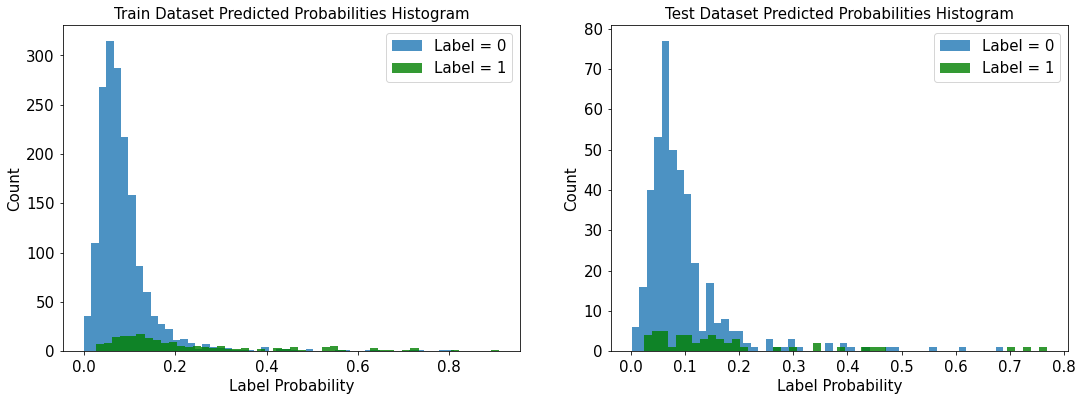

In [20]:
from sklearn.linear_model import LogisticRegression 
innovation_pipeline.train_model(LogisticRegression(penalty='l1', solver='saga', max_iter = 10000), Train_X=Train_X, train_y=train_y, Test_X=Test_X, test_y=test_y, 
                                    save_model = True, model_name=None)

**Get Model Coefficients (Only Logistic Regression)**

Function => get_model_coefficients(saved_model, Train_X, size = 20, mask = True)

1. The input is a saved model with a Pandas data frame in order to extract the coefficient names. The size has defaulted as 20 for each positive and negative category. Lastly, the mask parameter is used to filter out Doc2Vec embeddings scores and focus on TF-IDF words which can be interpreted semantically.  

2. There output is a printed Pandas data frame with ordered most positive and negative words.

In [22]:
innovation_pipeline.get_model_coefficients(saved_model = 'saved_model.pkl', Train_X = Train_X, size = 15)

,Negative Words,Coefficient,Positive Words,Coefficient
0,home,-2.287778,intelligence,4.300792
1,wij,-1.414420,data,3.104813
2,products,-1.148782,international,2.239828
3,producten,-1.139116,platform,2.147620
4,food,-0.949351,mensen,1.903732
5,contact,-0.896787,jobs,1.860589
6,read,-0.475133,demo,1.716417
7,via,-0.271265,automation,1.544254
8,advies,-0.251013,improve,1.258857
9,facebook,-0.222707,klanten,1.149777


**Make predictions with an existing model**

Function => make_prediction(saved_model, dataset_name = None, language = True, verbose = False)

1. The input is a saved model. The example below uses a pre-trained model with original CIS 2019 (logistic regression with l1 regularization). The dataset name parameter requires a CSV file name to read analogous with csv_to_dataframe function. The language boolean asks if the saved model uses language as a parameter. Lastly, verbose prints the TF-IDF words if switched to True.

2. The output is a Pandas data frame with three columns; the unique key, prediction probability and predicted label.

In [ ]:
pred = innovation_pipeline.make_prediction(saved_model='LR-D2V-IR01.pkl', dataset_name='scraped_html_file.csv', language=True, verbose=False)

**Redundant Code**

> To save VLAIO specific results

In [2]:
#To get labels

import pandas as pd
c = pd.read_csv("file.csv")
c.columns

Index(['Ondernemingsnummer', 'URL', 'Bedrijf', 'NACEBEL',
       'thema_Artificiële Intelligentie', 'thema_Bio-economie', 'thema_Bouw',
       'thema_Circulaire Economie', 'thema_Cybersecurity', 'thema_Diensten',
       'thema_Energie & Milieu', 'thema_Health & Care', 'thema_High potential',
       'thema_ICT', 'thema_ICT & Diensten', 'thema_Logistiek & Mobiliteit',
       'thema_Machinebouw & electronica', 'thema_Materialen & Chemie',
       'thema_Voeding(sketen)'],
      dtype='object')

In [15]:
# To filter-out some NACEBEL codes
df = pd.read_csv('scraped_html_file.csv')
df['NACEBEL_Initials'] = df.apply(lambda z: str(z.NACEBEL)[0:2], axis=1)
df.NACEBEL_Initials.value_counts()

46    283
62    212
71    136
70    106
10     86
     ... 
51      1
53      1
37      1
91      1
06      1
Name: NACEBEL_Initials, Length: 78, dtype: int64

In [ ]:
#Train model with NACEBEL <46> and get coefficients
df = df[df.NACEBEL_Initials == '46']
df = df[['Ondernemingsnummer', 'Clean_Text', 'thema_Bouw']]
df = df.rename(columns={'Ondernemingsnummer': 'key', 'Clean_Text': 'text', 'thema_Bouw': 'label'})

In [22]:
df.label.value_counts()

0    233
1     50
Name: label, dtype: int64

Training Accuracy:   0.8131313131313131
Test Accuracy:       0.8470588235294118
Classification Report of the Test Set: 
 
              precision    recall  f1-score   support

           0       0.85      1.00      0.92        72
           1       0.00      0.00      0.00        13

    accuracy                           0.85        85
   macro avg       0.42      0.50      0.46        85
weighted avg       0.72      0.85      0.78        85



c:\users\nusret\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


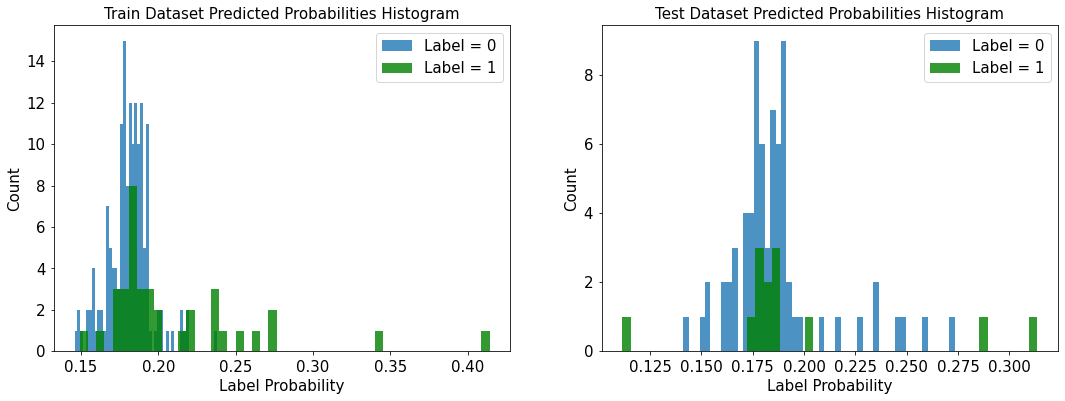

,Negative Words,Coefficient,Positive Words,Coefficient
0,news,-0.260439,tegels,1.545190
1,aanbod,0.000000,downloads,1.507916
2,oplossing,0.000000,projects,0.797466
3,oplossingen,0.000000,aanbod,0.000000
4,parket,0.000000,production,0.000000
5,partner,0.000000,partner,0.000000
6,partners,0.000000,partners,0.000000
7,per,0.000000,per,0.000000
8,plaatsing,0.000000,plaatsing,0.000000
9,policy,0.000000,policy,0.000000


In [24]:
from sklearn.linear_model import LogisticRegression 
de_dataset = innovation_pipeline.train_doc_embeddings(dataset=df.reset_index(drop=True), size=50, iteration=5, window=10, min_count=3)
Train_X, train_y, Test_X, test_y = innovation_pipeline.TFIDF_prebuild_sets_d2v(dataset=de_dataset, seed=22494, fraction=0.70, feature_count=200, oversample=True, 
                                                                                   size=150, label_oversample=1, embeddings = False, 
                                                                                   language = False, d2v = True, verbose = False)
innovation_pipeline.train_model(LogisticRegression(penalty='l1', solver='saga', max_iter = 10000), Train_X=Train_X, train_y=train_y, Test_X=Test_X, test_y=test_y, 
                                    save_model = True, model_name='Thema_Bouw_46.pkl') 
innovation_pipeline.get_model_coefficients(saved_model = 'Thema_Bouw_46.pkl', Train_X = Train_X, size = 15)